<a href="https://colab.research.google.com/github/Albasha1002/Machine_Learning_Project_with_Concept/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols=["fLength", "fWidth", "fSize", "fConc","fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha","fDist", "class"]

In [6]:
df=pd.read_csv("magic04.data",names=cols)

archive.ics.uci.edu/ml

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [8]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [9]:
df['class']=(df['class']=="g").astype(int)

In [10]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


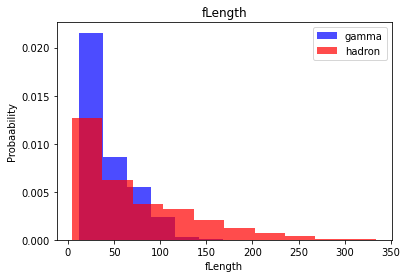

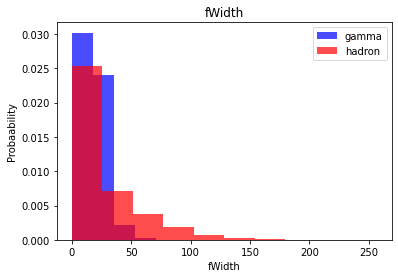

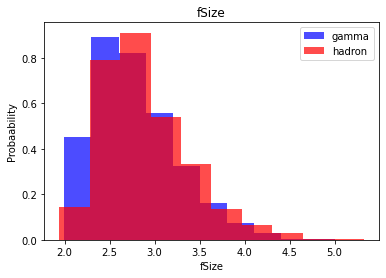

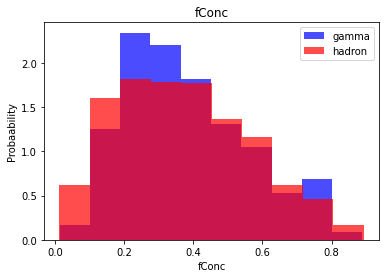

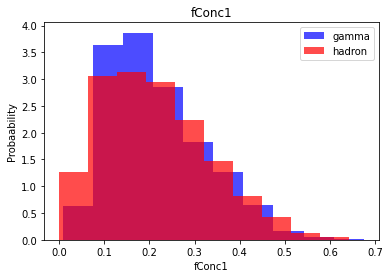

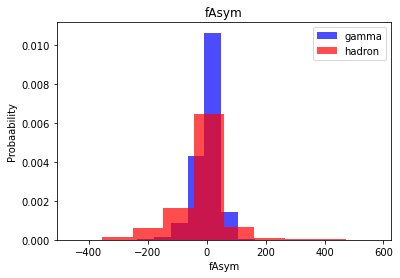

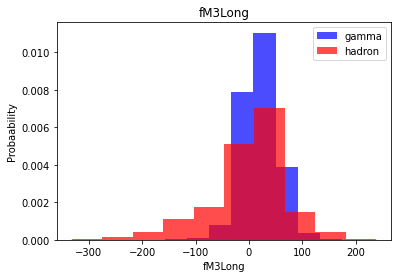

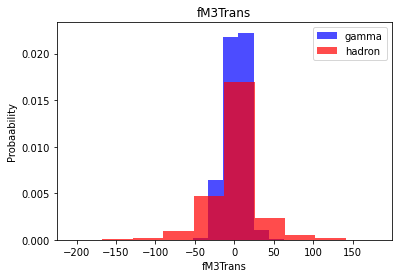

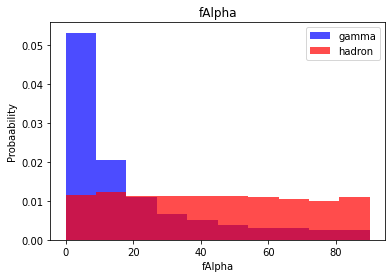

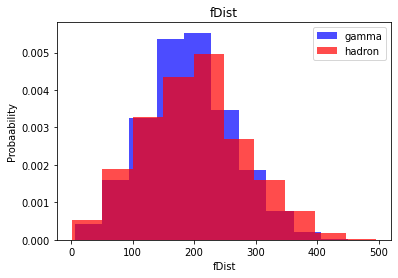

In [11]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==0][label],color='Red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probaability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
import numpy as np

In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [14]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [15]:
x=df.iloc[0:15217,0:9]

In [17]:
y=df.iloc[15217:,0:9]

In [16]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler= StandardScaler()
  x =scaler.fit_transform(x)
  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)
  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data, x,y

In [18]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [22]:
len(y_train)

14826

In [114]:
sum(y_train ==1)

7359

In [100]:
sum(y_train==0)

7327

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(x_train, y_train)

In [23]:
y_pred=knn_model.predict(x_test)

In [24]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [25]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72      1330
           1       0.84      0.88      0.86      2474

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model=GaussianNB()

In [29]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred=nb_model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53      1330
           1       0.74      0.90      0.82      2474

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg_model=LogisticRegression()

In [34]:
lg_model=lg_model.fit(x_train, y_train)

In [35]:
y_pred=lg_model.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1330
           1       0.85      0.82      0.83      2474

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [37]:
from sklearn.svm import SVC

In [38]:
svm_model=SVC()

In [39]:
svm_model=svm_model.fit(x_train,y_train)

In [40]:
y_pred=svm_model.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1330
           1       0.89      0.90      0.89      2474

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Network

In [42]:
import tensorflow as tf

In [43]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
    
  plt.show()

In [48]:
def train_model(x_train, y_train, num_nodes, dropout_prob,lr,batch_size,epochs):
  nn_model= tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dense(1,  activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                 metrics=['accuracy'])  
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=valid, verbose=0
    )

  return nn_model,history